# Classifying Hit Songs in 2010 based on Musical Characteristics
The dataset that was used for this project can be found on GitHub: https://github.com/fortytwo102/the-spotify-hit-predictor-dataset

The following variables are used and defined as such in this dataset:

* track: The name of the track.

* artist: The name of the Artist.

* uri: The resource identifier for the track.

* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
		   
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
	
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:
	
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
	
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
	
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
	
* duration_ms: The duration of the track measured in milliseconds.
	
* time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
	
* chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track (in milliseconds). This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
	
* sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call for Audio Analysis of that particular track.
	
* target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-10s.csv"
pd.read_csv(url)
music = pd.read_csv(url)
music_selection = pd.read_csv(url) #raw data
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6398 non-null   object 
 1   artist            6398 non-null   object 
 2   uri               6398 non-null   object 
 3   danceability      6398 non-null   float64
 4   energy            6398 non-null   float64
 5   key               6398 non-null   int64  
 6   loudness          6398 non-null   float64
 7   mode              6398 non-null   int64  
 8   speechiness       6398 non-null   float64
 9   acousticness      6398 non-null   float64
 10  instrumentalness  6398 non-null   float64
 11  liveness          6398 non-null   float64
 12  valence           6398 non-null   float64
 13  tempo             6398 non-null   float64
 14  duration_ms       6398 non-null   int64  
 15  time_signature    6398 non-null   int64  
 16  chorus_hit        6398 non-null   float64


In [2]:
music.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.0000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.8140,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.0000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.0000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.0000,0.3910,0.780,160.517,144244,4,24.99199,8,1
5,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.0000,0.4090,0.737,165.084,214320,4,32.17301,12,1
6,Sex Metal Barbie,In This Moment,spotify:track:75BGF4LC7AOLFfxn6ukZDH,0.533,0.935,0,-3.704,1,0.1280,0.01390,0.0000,0.1680,0.481,140.092,262493,4,21.04510,14,0
7,Helluva Night,Ludacris,spotify:track:0flKDWZq11997Fb2ptkQvu,0.736,0.522,2,-8.020,1,0.1160,0.02990,0.0000,0.1080,0.369,97.547,200387,4,60.21027,10,1
8,Holiday With HH,No Bros,spotify:track:7LBa0KNFR8IY3g7LOfXqu8,0.166,0.985,7,-2.886,1,0.1700,0.00183,0.0142,0.9580,0.139,174.725,252787,4,31.23583,11,0
9,My Last,Big Sean Featuring Chris Brown,spotify:track:70tFuqBcduJv15bEnOPRTh,0.387,0.773,8,-5.685,1,0.1700,0.09800,0.0000,0.2090,0.368,78.629,254120,4,23.30245,9,1


In [3]:
music['target'].unique()

array([1, 0])

In [4]:
music["target"] = music["target"].replace({
    0 : "Flop",
    1: "Hit"
}).astype("category")

music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track             6398 non-null   object  
 1   artist            6398 non-null   object  
 2   uri               6398 non-null   object  
 3   danceability      6398 non-null   float64 
 4   energy            6398 non-null   float64 
 5   key               6398 non-null   int64   
 6   loudness          6398 non-null   float64 
 7   mode              6398 non-null   int64   
 8   speechiness       6398 non-null   float64 
 9   acousticness      6398 non-null   float64 
 10  instrumentalness  6398 non-null   float64 
 11  liveness          6398 non-null   float64 
 12  valence           6398 non-null   float64 
 13  tempo             6398 non-null   float64 
 14  duration_ms       6398 non-null   int64   
 15  time_signature    6398 non-null   int64   
 16  chorus_hit        6398 n

In [5]:
explore_music = pd.DataFrame()
explore_music["Count"] = music.groupby("target")["track"].count()
explore_music["Percentage"] = 100 * explore_music["Count"]/len(music)
explore_music

,Count,Percentage
target,,
Flop,3199,50.0
Hit,3199,50.0


## Feature Selection
### Exploratory Data Analysis, ANOVA, and Chi Squared Test
I would also like to use exploratory data analysis to find relationships between the features and the target variables. We will use boxplots and the ANOVA analysis to determine whether there is enough variation for the feature to be able to predict the target variable.

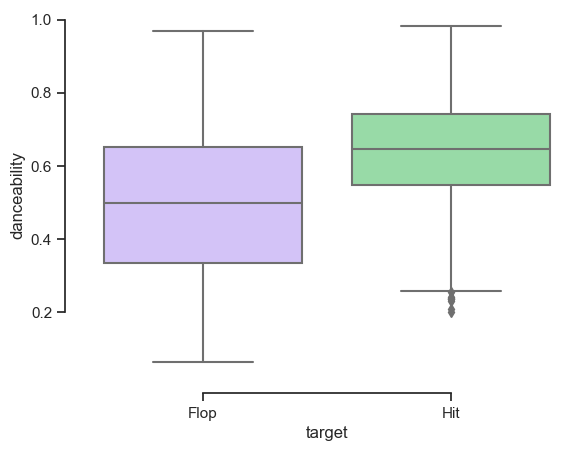

In [6]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="danceability",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [7]:
dancehit = music.loc[
    music["target"] == "Hit", ["target", "danceability"]
]
danceflop = music.loc[
    music["target"] == "Flop", ["target", "danceability"]
]

In [8]:
# From: https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
dance_hit_dist = list(dancehit.danceability)
dance_flop_dist = list(danceflop.danceability)

 
# Conduct the one-way ANOVA
f_oneway(dance_hit_dist, dance_flop_dist)

F_onewayResult(statistic=1109.5416727163974, pvalue=1.726517935352893e-224)

Since the p-value < 0.05, this indicates that danceability is a possible feature for our model.

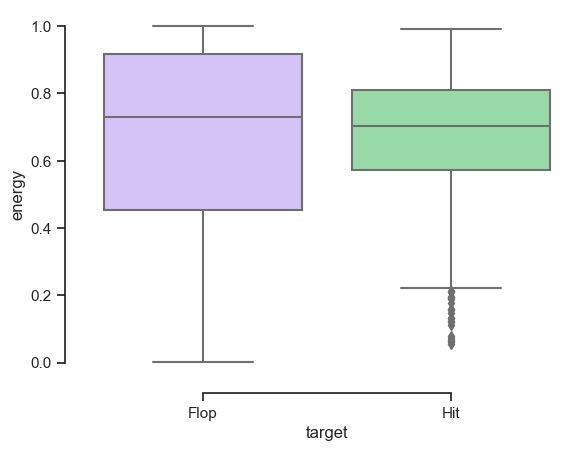

In [9]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="energy",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [10]:
energyhit = music.loc[
    music["target"] == "Hit", ["target", "energy"]
]
energyflop = music.loc[
    music["target"] == "Flop", ["target", "energy"]
]

In [11]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
energy_hit_dist = list(energyhit.energy)
energy_flop_dist = list(energyflop.energy)

 
# Conduct the one-way ANOVA
f_oneway(energy_hit_dist, energy_flop_dist)

F_onewayResult(statistic=23.653739874859664, pvalue=1.1807930832105677e-06)

Since the p-value < 0.05, this indicates that energy is a possible feature for our model.

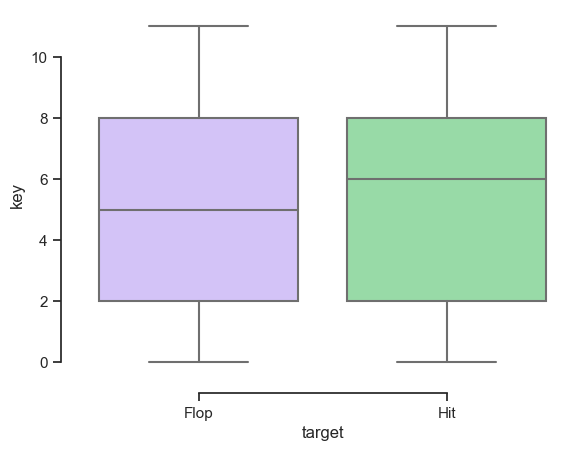

In [12]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="key",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [13]:
keyhit = music.loc[
    music["target"] == "Hit", ["target", "key"]
]
keyflop = music.loc[
    music["target"] == "Flop", ["target", "key"]
]

In [14]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
key_hit_dist = list(keyhit.key)
key_flop_dist = list(keyflop.key)

 
# Conduct the one-way ANOVA
f_oneway(key_hit_dist, key_flop_dist)

F_onewayResult(statistic=0.1968872592737577, pvalue=0.6572601893888587)

Since the p-value > 0.05, this indicates that the key of the song should not be considered as a feature in the model. However, since key is a categorical feataure, we should perform the chi-squared test as well (shown later in this notebook).

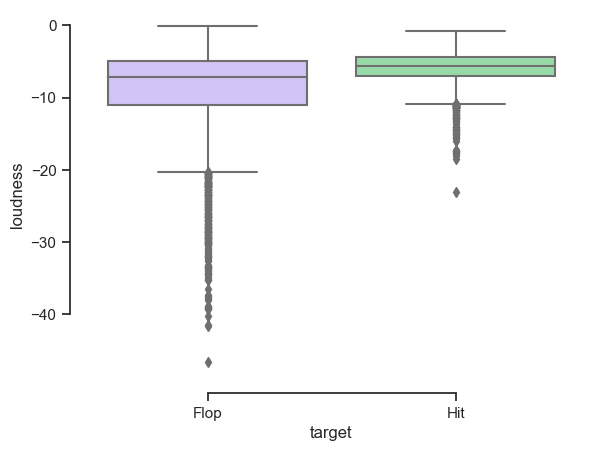

In [15]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="loudness",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [16]:
loudhit = music.loc[
    music["target"] == "Hit", ["target", "loudness"]
]
loudflop = music.loc[
    music["target"] == "Flop", ["target", "loudness"]
]

In [17]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
loud_hit_dist = list(loudhit.loudness)
loud_flop_dist = list(loudflop.loudness)

 
# Conduct the one-way ANOVA
f_oneway(loud_hit_dist, loud_flop_dist)

F_onewayResult(statistic=768.2778663284391, pvalue=8.651026989392484e-160)

Since the p-value < 0.05, this indicates that loudness is a possible feature for our model.

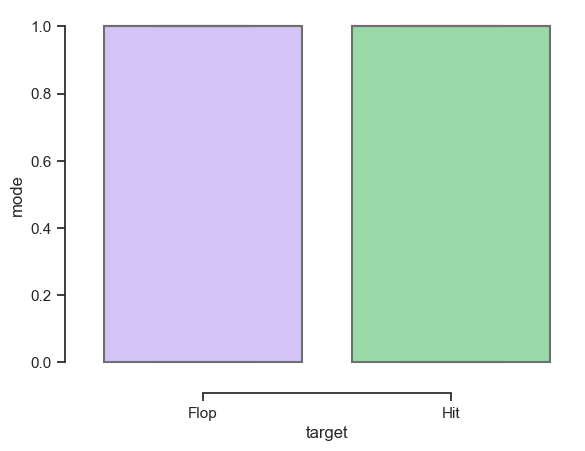

In [18]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="mode",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [19]:
modehit = music.loc[
    music["target"] == "Hit", ["target", "mode"]
]
modeflop = music.loc[
    music["target"] == "Flop", ["target", "mode"]
]


In [20]:
mode_explore = pd.DataFrame()
mode_explore["Count"] = music.groupby(["mode","target"])["target"].count()
mode_explore["Percentage"] = 100 * mode_explore["Count"]/len(music)
mode_explore

Count  Percentage
mode target                   
0    Flop     1183   18.490153
     Hit      1085   16.958425
1    Flop     2016   31.509847
     Hit      2114   33.041575

In [21]:
import numpy
numpy.array(music_selection["mode"])

array([0, 0, 0, ..., 1, 1, 0])

We are unable to perform ANOVA on the mode of the songs. However, we will perform the chi-squared test later in this notebook since mode is a categorical variable.

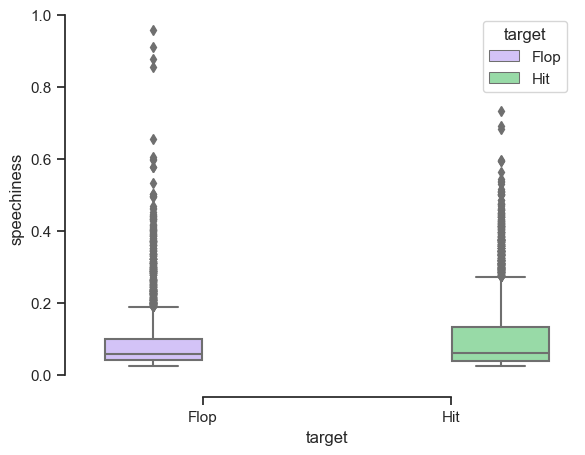

In [22]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="speechiness",
            hue="target", palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [23]:
speechhit = music.loc[
    music["target"] == "Hit", ["target", "speechiness"]
]
speechflop = music.loc[
    music["target"] == "Flop", ["target", "speechiness"]
]

In [24]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
speech_hit_dist = list(speechhit.speechiness)
speech_flop_dist = list(speechflop.speechiness)

 
# Conduct the one-way ANOVA
f_oneway(speech_hit_dist, speech_flop_dist)

F_onewayResult(statistic=61.74522672351272, pvalue=4.554479405525479e-15)

Since the p-value < 0.05, this indicates that speechiness is a possible feature for our model.

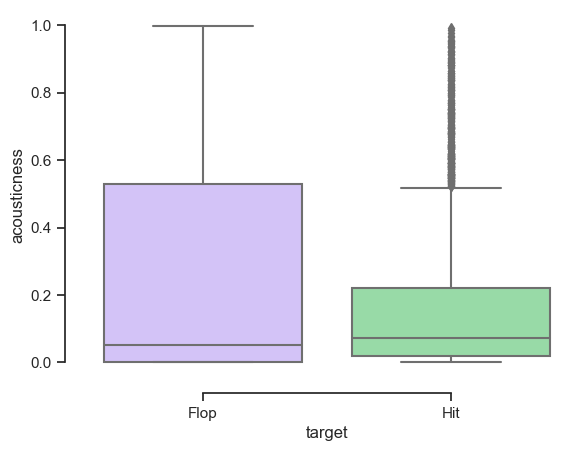

In [25]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="acousticness",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [26]:
acoustichit = music.loc[
    music["target"] == "Hit", ["target", "acousticness"]
]
acousticflop = music.loc[
    music["target"] == "Flop", ["target", "acousticness"]
]

In [27]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
acoustic_hit_dist = list(acoustichit.acousticness)
acoustic_flop_dist = list(acousticflop.acousticness)

 
# Conduct the one-way ANOVA
f_oneway(acoustic_hit_dist, acoustic_flop_dist)

F_onewayResult(statistic=225.34179232387768, pvalue=4.375475736145466e-50)

Since the p-value < 0.05, this indicates that acousticness is a possible feature for our model.

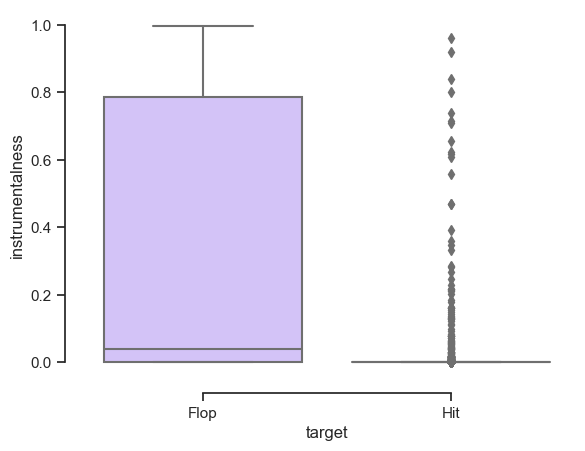

In [28]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="instrumentalness",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [29]:
instruhit = music.loc[
    music["target"] == "Hit", ["target", "instrumentalness"]
]
instruflop = music.loc[
    music["target"] == "Flop", ["target", "instrumentalness"]
]

In [30]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
instru_hit_dist = list(instruhit.instrumentalness)
instru_flop_dist = list(instruflop.instrumentalness)

 
# Conduct the one-way ANOVA
f_oneway(instru_hit_dist, instru_flop_dist)

F_onewayResult(statistic=2127.7290848461903, pvalue=0.0)

Since the p-value < 0.05, this indicates that instrumentalness is a possible feature for our model.

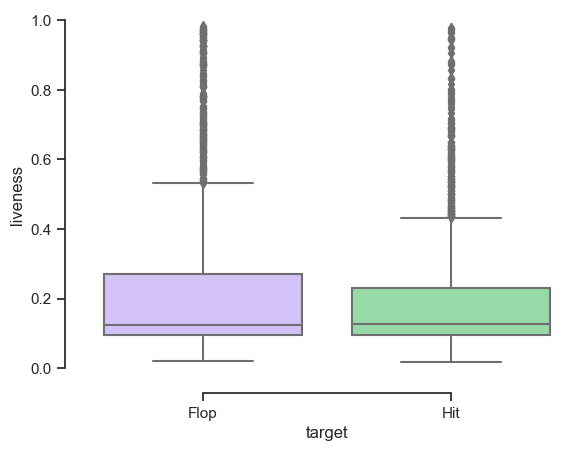

In [31]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="liveness",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [32]:
livehit = music.loc[
    music["target"] == "Hit", ["target", "liveness"]
]
liveflop = music.loc[
    music["target"] == "Flop", ["target", "liveness"]
]

In [33]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
live_hit_dist = list(livehit.liveness)
live_flop_dist = list(liveflop.liveness)

 
# Conduct the one-way ANOVA
f_oneway(live_hit_dist, live_flop_dist)

F_onewayResult(statistic=25.17284696466066, pvalue=5.382999030442041e-07)

Since the p-value < 0.05, this indicates that liveness is a possible feature for our model.

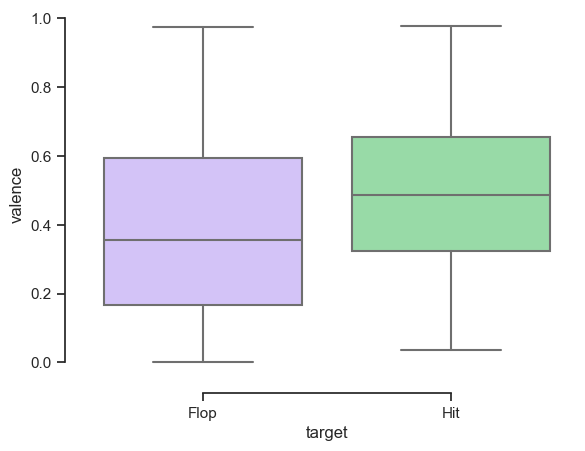

In [34]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="valence",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [35]:
valhit = music.loc[
    music["target"] == "Hit", ["target", "valence"]
]
valflop = music.loc[
    music["target"] == "Flop", ["target", "valence"]
]

In [36]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
val_hit_dist = list(valhit.valence)
val_flop_dist = list(valflop.valence)

 
# Conduct the one-way ANOVA
f_oneway(val_hit_dist, val_flop_dist)

F_onewayResult(statistic=277.0917307681701, pvalue=6.101795088838142e-61)

Since the p-value < 0.05, this indicates that valence is a possible feature for our model.

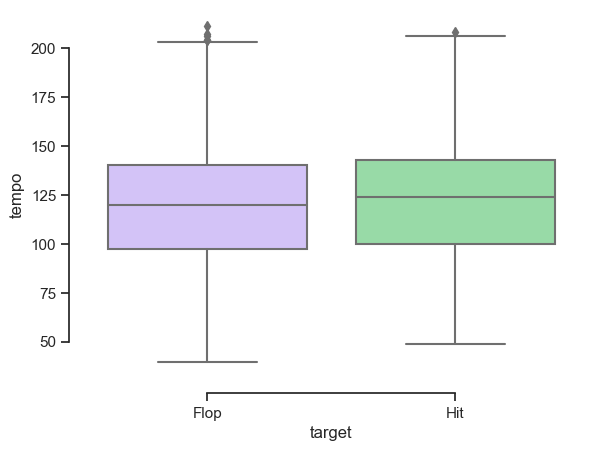

In [37]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="tempo",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [38]:
tempohit = music.loc[
    music["target"] == "Hit", ["target", "tempo"]
]
tempoflop = music.loc[
    music["target"] == "Flop", ["target", "tempo"]
]

In [39]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
tempo_hit_dist = list(tempohit.tempo)
tempo_flop_dist = list(tempoflop.tempo)

 
# Conduct the one-way ANOVA
f_oneway(tempo_hit_dist, tempo_flop_dist)

F_onewayResult(statistic=9.856600920457995, pvalue=0.0016999393952096121)

Since the p-value < 0.05, this indicates that tempo is a possible feature for our model.

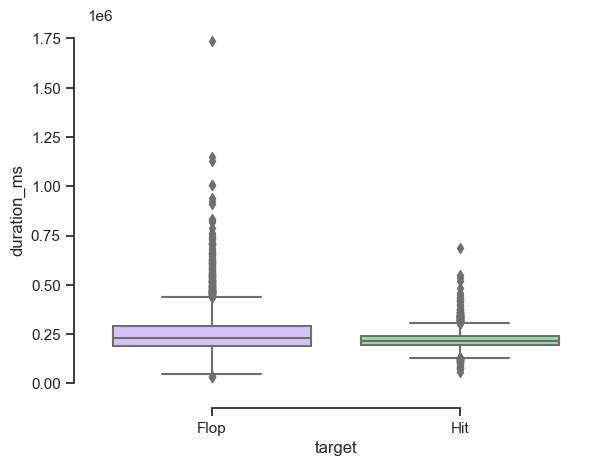

In [40]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="duration_ms",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [41]:
durhit = music.loc[
    music["target"] == "Hit", ["target", "duration_ms"]
]
durflop = music.loc[
    music["target"] == "Flop", ["target", "duration_ms"]
]

In [42]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
dur_hit_dist = list(durhit.duration_ms)
dur_flop_dist = list(durflop.duration_ms)

 
# Conduct the one-way ANOVA
f_oneway(dur_hit_dist, dur_flop_dist)

F_onewayResult(statistic=237.46438208908933, pvalue=1.229321480745577e-52)

Since the p-value < 0.05, this indicates that song duration is a possible feature for our model.

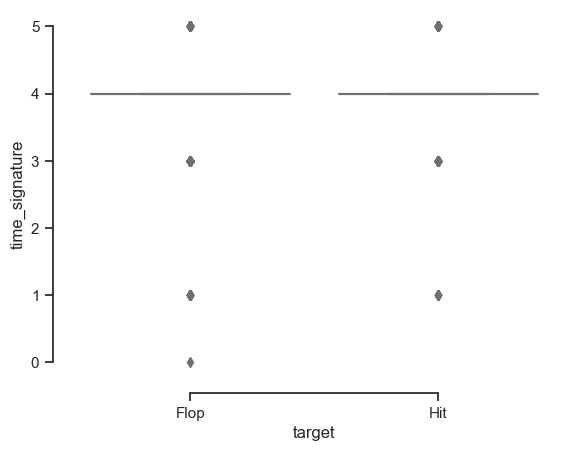

In [43]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="time_signature",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [44]:
timesighit = music.loc[
    music["target"] == "Hit", ["target", "time_signature"]
]
timesigflop = music.loc[
    music["target"] == "Flop", ["target", "time_signature"]
]

In [45]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
timesig_hit_dist = list(timesighit.time_signature)
timesig_flop_dist = list(timesigflop.time_signature)

 
# Conduct the one-way ANOVA
f_oneway(timesig_hit_dist, timesig_flop_dist)

F_onewayResult(statistic=105.76662771271509, pvalue=1.2888242486856055e-24)

Since the p-value < 0.05, this indicates that the song's time signature is a possible feature for our model.

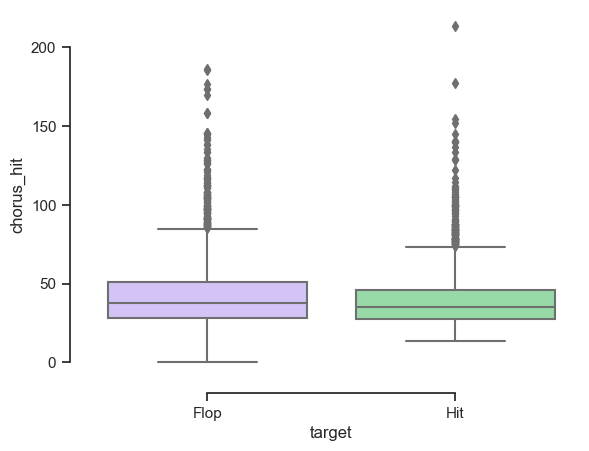

In [46]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="chorus_hit",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [47]:
chorushit = music.loc[
    music["target"] == "Hit", ["target", "chorus_hit"]
]
chorusflop = music.loc[
    music["target"] == "Flop", ["target", "chorus_hit"]
]

In [48]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
chorus_hit_dist = list(chorushit.chorus_hit)
chorus_flop_dist = list(chorusflop.chorus_hit)

 
# Conduct the one-way ANOVA
f_oneway(chorus_hit_dist, chorus_flop_dist)

F_onewayResult(statistic=47.19756710616262, pvalue=7.024433454879685e-12)

Since the p-value < 0.05, this indicates that the time when the chorus hits is a possible feature for our model.

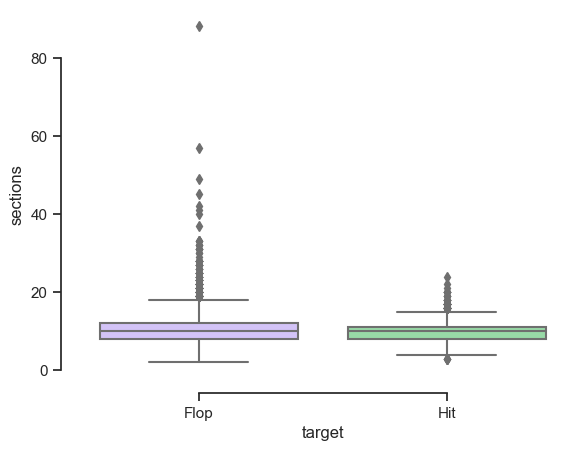

In [49]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="target", y="sections",
            palette=["m", "g"],
            data=music)
sns.despine(offset=10, trim=True)

In [50]:
sectionhit = music.loc[
    music["target"] == "Hit", ["target", "sections"]
]
sectionflop = music.loc[
    music["target"] == "Flop", ["target", "sections"]
]

In [51]:
# Importing library
from scipy.stats import f_oneway
 
# Compare Hit vs. Flop distributions
section_hit_dist = list(sectionhit.sections)
section_flop_dist = list(sectionflop.sections)

 
# Conduct the one-way ANOVA
f_oneway(section_hit_dist, section_flop_dist)

F_onewayResult(statistic=83.296132198407, pvalue=9.302428066692014e-20)

Since the p-value < 0.05, this indicates that the number of sections the song has is a possible feature for our model.

### Chi-Squared Test
I would like to use the chi-squared test to investigate the relationship between our categorical inputs and outputs, specifically for the song's key and mode.

In [52]:
key_list = list(music_selection["key"])
key_array = numpy.array(key_list)

mode_list = list(music_selection["mode"])
mode_array = numpy.array(mode_list)

target_list = list(music_selection["target"])
target_array = numpy.array(target_list)

In [53]:
#Based on: https://github.com/gsampath127/Feature-Selection/blob/master/FeatureSelection_ChiSquareTest.ipynb

from sklearn.feature_selection import chi2


X = numpy.array([key_array,mode_array]).T
y = target_array

chi_scores = chi2(X,y)

chi_scores

#We want to select features with values less than p = 0.05. The first array represents chi square values whereas the second array represents p-values

(array([0.48467637, 2.32542373]), array([0.48631171, 0.12727556]))

We want to select features for our model with values that are less than p = 0.05. The first array of results in our output represents the chi-square values, while the second array represents the corresponding p-values for the variables key and mode. Since both p-values for key (0.48631171) and mode (0.12727556) are less than 0.05, this suggests that we should not use these features for our classification model.

### Forward Feature Selection

We will now perform forward selection in order to find the most optimal features to select for our classification model. This process is based on Stats Wire's YouTube video: https://www.youtube.com/watch?v=POCvLGRLDzM

In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector
url = "https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-10s.csv"
pd.read_csv(url)
music_selection = pd.read_csv(url)

In [55]:
#Check if there are any missing values
music_selection.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [56]:
#Check if there are any missing values from any row
music_selection[music_selection.isnull().any(axis=1)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target


In [57]:
X = music_selection.iloc[:, 3:17] #Select all rows and numerical features
y = music_selection.iloc[:,-1] #Select target features (hit or flop)

In [58]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681
1,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083
2,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147
3,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521
4,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199


In [59]:
y

0       1
1       0
2       1
3       0
4       1
       ..
6393    0
6394    1
6395    1
6396    0
6397    0
Name: target, Length: 6398, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) #Size of test split is 30% of dataset, random_state is used to control the shuffling applied to the data before the split (any int)


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
forward_feature_selection = SequentialFeatureSelector(KNeighborsClassifier(n_jobs = -1), 
                                                      k_features = (1,14), 
                                                      forward = True, 
                                                      verbose = 2, 
                                                      scoring = "accuracy",
                                                      cv = 5).fit(X_train, y_train)


[2023-07-30 20:38:37] Features: 1/14 -- score: 0.7110552174780527
[2023-07-30 20:38:39] Features: 2/14 -- score: 0.7713310554668794
[2023-07-30 20:38:41] Features: 3/14 -- score: 0.7711038507581804
[2023-07-30 20:38:42] Features: 4/14 -- score: 0.7731115323224261
[2023-07-30 20:38:43] Features: 5/14 -- score: 0.7795844972067039
[2023-07-30 20:38:45] Features: 6/14 -- score: 0.7849463786911413
[2023-07-30 20:38:46] Features: 7/14 -- score: 0.7860634477254589
[2023-07-30 20:38:47] Features: 8/14 -- score: 0.7831631584197923
[2023-07-30 20:38:48] Features: 9/14 -- score: 0.7860614525139664
[2023-07-30 20:38:48] Features: 10/14 -- score: 0.7664133579409417
[2023-07-30 20:38:49] Features: 11/14 -- score: 0.7170620510774142
[2023-07-30 20:38:49] Features: 12/14 -- score: 0.6469405925778132
[2023-07-30 20:38:49] Features: 13/14 -- score: 0.6076371707901038
[2023-07-30 20:38:50] Features: 14/14 -- score: 0.6098703112529928

In [63]:
forward_feature_selection.k_feature_names_

('danceability',
 'energy',
 'loudness',
 'speechiness',
 'instrumentalness',
 'valence',
 'time_signature')

In [64]:
forward_feature_selection.k_score_

0.7860634477254589

In [65]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[0.5234375, 0.7421875, 0.7622767857142857, 0.7...",0.711055,"(instrumentalness,)",0.121028,0.094164,0.047082
2,"(1, 7)","[0.7622767857142857, 0.7555803571428571, 0.775...",0.771331,"(energy, instrumentalness)",0.015194,0.011822,0.005911
3,"(1, 7, 12)","[0.7700892857142857, 0.7622767857142857, 0.777...",0.771104,"(energy, instrumentalness, time_signature)",0.014708,0.011443,0.005722
4,"(1, 3, 7, 12)","[0.7645089285714286, 0.7734375, 0.787946428571...",0.773112,"(energy, loudness, instrumentalness, time_sign...",0.010213,0.007946,0.003973
5,"(0, 1, 3, 7, 12)","[0.7823660714285714, 0.7779017857142857, 0.799...",0.779584,"(danceability, energy, loudness, instrumentaln...",0.014138,0.011,0.0055
6,"(0, 1, 3, 7, 9, 12)","[0.7879464285714286, 0.7912946428571429, 0.785...",0.784946,"(danceability, energy, loudness, instrumentaln...",0.006057,0.004713,0.002356
7,"(0, 1, 3, 5, 7, 9, 12)","[0.7890625, 0.7834821428571429, 0.793526785714...",0.786063,"(danceability, energy, loudness, speechiness, ...",0.006424,0.004998,0.002499
8,"(0, 1, 3, 5, 7, 8, 9, 12)","[0.7756696428571429, 0.78125, 0.78794642857142...",0.783163,"(danceability, energy, loudness, speechiness, ...",0.006187,0.004814,0.002407
9,"(0, 1, 3, 5, 6, 7, 8, 9, 12)","[0.78125, 0.7879464285714286, 0.80580357142857...",0.786061,"(danceability, energy, loudness, speechiness, ...",0.014054,0.010934,0.005467
10,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 12)","[0.7433035714285714, 0.7712053571428571, 0.785...",0.766413,"(danceability, energy, loudness, mode, speechi...",0.017535,0.013643,0.006822


Based on forward selection, the most optimal features to include in the K Neighbors Classification model are danceability, energy, loudness, speechiness, instrumentalness, valence, and time signature.

## Modelling

In [66]:
# load packages
import altair as alt
import pandas as pd
import numpy as np

# set the seed
np.random.seed(1)

In [67]:
from sklearn.model_selection import train_test_split

music_train, music_test = train_test_split(
    music, train_size=0.75, stratify=music["target"]
)
#Stratify is used to ensure that the training and testing subsets contain the right proportions of each category of observation (Hit vs. Flop)
music_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4798 entries, 5826 to 5622
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track             4798 non-null   object  
 1   artist            4798 non-null   object  
 2   uri               4798 non-null   object  
 3   danceability      4798 non-null   float64 
 4   energy            4798 non-null   float64 
 5   key               4798 non-null   int64   
 6   loudness          4798 non-null   float64 
 7   mode              4798 non-null   int64   
 8   speechiness       4798 non-null   float64 
 9   acousticness      4798 non-null   float64 
 10  instrumentalness  4798 non-null   float64 
 11  liveness          4798 non-null   float64 
 12  valence           4798 non-null   float64 
 13  tempo             4798 non-null   float64 
 14  duration_ms       4798 non-null   int64   
 15  time_signature    4798 non-null   int64   
 16  chorus_hit        4798 non

In [68]:
music_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 202 to 932
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track             1600 non-null   object  
 1   artist            1600 non-null   object  
 2   uri               1600 non-null   object  
 3   danceability      1600 non-null   float64 
 4   energy            1600 non-null   float64 
 5   key               1600 non-null   int64   
 6   loudness          1600 non-null   float64 
 7   mode              1600 non-null   int64   
 8   speechiness       1600 non-null   float64 
 9   acousticness      1600 non-null   float64 
 10  instrumentalness  1600 non-null   float64 
 11  liveness          1600 non-null   float64 
 12  valence           1600 non-null   float64 
 13  tempo             1600 non-null   float64 
 14  duration_ms       1600 non-null   int64   
 15  time_signature    1600 non-null   int64   
 16  chorus_hit        1600 non-n

In [69]:
music_train["target"].value_counts(normalize=True)

target
Flop    0.5
Hit     0.5
Name: proportion, dtype: float64

Proportions of the training data are the same as before we split the data

### Preprocessing the Data

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

music_preprocessor = make_column_transformer(
    (StandardScaler(), ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]),
)

### Training the Model

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier(n_neighbors=3) 

X = music_train.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]]
y = music_train["target"]

knn_fit = make_pipeline(music_preprocessor, knn).fit(X, y)

knn_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'instrumentalness',
                                                   'valence',
                                                   'time_signature'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

I chose to use the Pipeline in the scikit-learn package since it allows me to string multiple data analysis steps while reducing the amount of code I need to write for intermediate steps.

### Label Predictions and Accuracy

In [72]:
music_test_predictions = music_test.assign(
    predicted = knn_fit.predict(music_test.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]])
)
music_test_predictions[["track", "target", "predicted"]]

,track,target,predicted
202,Enemy - Radio Edit,Flop,Hit
4893,"Wat U Mean (Aye, Aye, Aye)",Hit,Hit
6033,Woman,Hit,Hit
2988,"La Dinastía Fernández - La Derrota / Volver, V...",Flop,Hit
121,Lois Lane,Flop,Hit
...,...,...,...
669,Sitting on the Roof of S.F.A.I.,Flop,Hit
149,Seal The Deal,Flop,Flop
813,California King Bed,Hit,Hit
45,Money,Flop,Flop


In [73]:
music_acc_1 = knn_fit.score(
    music_test.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]],
    music_test["target"]
)
music_acc_1

0.793125

In [74]:
#Confusion Matrix

pd.crosstab(
    music_test_predictions["target"],
    music_test_predictions["predicted"]
)

predicted,Flop,Hit
target,,
Flop,593,207
Hit,124,676


### Tuning the Model and Selecting Optimal K Value

#### Performing 5-fold Cross Validation

In [75]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=3) 
music_pipe = make_pipeline(music_preprocessor, knn)
X = music_train.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]]
y = music_train["target"]
cv_5_df = pd.DataFrame(
    cross_validate(
        estimator=music_pipe,
        cv=5,
        X=X,
        y=y
    )
)

cv_5_df

,fit_time,score_time,test_score
0,0.004198,0.021277,0.794792
1,0.003863,0.020818,0.775000
2,0.003700,0.020649,0.771875
3,0.003586,0.020691,0.792492
4,0.003755,0.020766,0.785193


In [76]:
cv_5_metrics = cv_5_df.agg(['mean', 'sem'])
cv_5_metrics

,fit_time,score_time,test_score
mean,0.003820,0.020840,0.783870
sem,0.000104,0.000113,0.004571


Average accuracy is 78.22% with +/- 0.456% error when we have K = 3

#### Selecting the most optimal K Value

In [77]:
knn = KNeighborsClassifier()
music_tune_pipe = make_pipeline(music_preprocessor, knn)

In [78]:
music_tune_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    ['danceability', 'energy', 'loudness',
                                     'speechiness', 'instrumentalness', 'valence',
                                     'time_signature'])])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  ['danceability', 'energy', 'loudness',
                                   'speechiness', 'instrumentalness', 'valence',
                                   'time_signature'])]),
 'kneighborsclassifier': KNeighborsClassifier(),
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__transformer_weights': None,
 'columntransformer__transformers': [('standardscaler',
   Standar

In [79]:
parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 100, 5),
}

In [80]:
from sklearn.model_selection import GridSearchCV

music_tune_grid = GridSearchCV(
    estimator = music_tune_pipe,
    param_grid = parameter_grid,
    cv = 10
)

In [81]:
accuracies_grid = pd.DataFrame(
             music_tune_grid
             .fit(music_train.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]],
                  music_train["target"]
            ).cv_results_)

accuracies_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   mean_fit_time                            20 non-null     float64
 1   std_fit_time                             20 non-null     float64
 2   mean_score_time                          20 non-null     float64
 3   std_score_time                           20 non-null     float64
 4   param_kneighborsclassifier__n_neighbors  20 non-null     object 
 5   params                                   20 non-null     object 
 6   split0_test_score                        20 non-null     float64
 7   split1_test_score                        20 non-null     float64
 8   split2_test_score                        20 non-null     float64
 9   split3_test_score                        20 non-null     float64
 10  split4_test_score                        20 non-null

In [82]:
accuracies_grid = accuracies_grid[["param_kneighborsclassifier__n_neighbors", "mean_test_score", "std_test_score"]
              ].assign(
                  sem_test_score = accuracies_grid["std_test_score"] / 10**(1/2)
              ).rename(
                  columns = {"param_kneighborsclassifier__n_neighbors" : "n_neighbors"}
              ).drop(
                  columns = ["std_test_score"]
              )
accuracies_grid

,n_neighbors,mean_test_score,sem_test_score
0,1,0.749277,0.006129
1,6,0.782412,0.004650
2,11,0.799293,0.003812
3,16,0.804500,0.005493
4,21,0.796789,0.005416
5,26,0.797210,0.004830
6,31,0.794291,0.005213
7,36,0.792207,0.004509
8,41,0.791788,0.005662
9,46,0.790539,0.005734


In [83]:
#Graph accuracy vs. k value 

import altair as alt

accuracy_vs_k = (
    alt.Chart(accuracies_grid)
    .mark_line(point=True)
    .encode(
        x=alt.X(
            "n_neighbors",
            title="Neighbors",
        ),
        y=alt.Y(
            "mean_test_score",
            title="Accuracy estimate",
            scale=alt.Scale(domain=(0.74, 0.82)),
        ),
    )
)

accuracy_vs_k

alt.Chart(...)



Therefore, the most optimal K value is 16 with an accuracy of 80.45% with +/- 0.549% error.

### Training the Final Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier(n_neighbors = 16)

X = music_train.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]]
y = music_train["target"]

knn_fit = make_pipeline(music_preprocessor, knn).fit(X, y)

knn_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'instrumentalness',
                                                   'valence',
                                                   'time_signature'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=16))])

In [85]:
music_test_predictions_final = music_test.assign(
    predicted = knn_fit.predict(music_test.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]])
)
music_test_predictions_final[["track", "target", "predicted"]]

,track,target,predicted
202,Enemy - Radio Edit,Flop,Hit
4893,"Wat U Mean (Aye, Aye, Aye)",Hit,Hit
6033,Woman,Hit,Hit
2988,"La Dinastía Fernández - La Derrota / Volver, V...",Flop,Hit
121,Lois Lane,Flop,Hit
...,...,...,...
669,Sitting on the Roof of S.F.A.I.,Flop,Hit
149,Seal The Deal,Flop,Flop
813,California King Bed,Hit,Hit
45,Money,Flop,Flop


In [86]:
music_acc_final = knn_fit.score(
    music_test.loc[:, ["danceability", "energy", "loudness", "speechiness", "instrumentalness", "valence", "time_signature"]],
    music_test["target"]
)
music_acc_final

0.81875

In [87]:
#Confusion Matrix

pd.crosstab(
    music_test_predictions_final["target"],
    music_test_predictions_final["predicted"]
)

predicted,Flop,Hit
target,,
Flop,586,214
Hit,76,724


Therefore, my final classification model is able to classify whether or not a song was a hit in the 2010's based on several musical characteristics such as danceability, energy, loudness, speechiness, instrumentalness, valence, and time signature with **81.88% accuracy**.